In [82]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd # geospatial data processing
import numpy as np # linear algebra operations
import matplotlib.pyplot as plt # plotting
import sklearn.linear_model as lm # linear regression
from sklearn.feature_selection import SequentialFeatureSelector # subset selection
from sklearn.model_selection import train_test_split # train-test split of data
from sklearn.metrics import mean_squared_error # MSE calculator

# Import and Clean Data

### Importing the Data

In [83]:
housing_org = pd.read_csv("housing.csv", low_memory=False)  # read in data
crimes_org = pd.read_csv("crimes.csv", low_memory=False)
parks_org = gpd.read_file("park.geojson")
tract_boundaries = gpd.read_file('b.geojson')\
# shoudl take around 30-40 seconds to run
print(housing_org.shape)

(678656, 80)


### Filtering the Data

In [84]:
crimes_filt = crimes_org[crimes_org['Latitude'] > 41 ]
crimes_filt = crimes_filt[crimes_filt['Latitude'] < 43]
crimes_filt = crimes_filt[crimes_filt['Longitude'] > -88]
crimes_filt = crimes_filt[crimes_filt['Longitude'] < -87.5]

parks_org.x_coord = parks_org.x_coord.astype(float)
parks_org.y_coord = parks_org.y_coord.astype(float)
parks_org.objectid_1 = parks_org.objectid_1.astype(int)
parks_org.gisobjid = parks_org.gisobjid.astype(float)
parks_org.park_no = parks_org.park_no.astype(float)

parks_filt = parks_org[(parks_org['y_coord']) > 41 ]
parks_filt = parks_filt[parks_filt['y_coord'] < 43]
parks_filt = parks_filt[parks_filt['x_coord'] > -88]
parks_filt = parks_filt[parks_filt['x_coord'] < -87.5]

In [85]:
housing_filt = housing_org[
    [
        "Property Index Number",
        "Property Class",
        "Township Name",
        "Number of Active 288s (HIEs)",
        "Number of Ended 288s (HIEs)",
        "Sale Price",
        "Land Square Feet",
        "Large Home Indicator",
        "Age",
        "Apartments",
        "Wall Material",
        "Roof Material",
        "Rooms",
        "Bedrooms",
        "Basement",
        "Basement Finish",
        "Central Heating",
        "Central Air Conditioning",
        "Fireplaces",
        "Attic Type",
        "Full Baths",
        "Half Baths",
        "Cathedral Ceiling",
        "Garage 1 Size",
        "Garage 1 Material",
        "Garage 1 Attached",
        "Garage 1 Area",
        "Building Square Feet",
        "Repair Condition",
        "Attic Finish",
        "Renovation",
        "Porch",
        "Tract GEOID",
        "O'Hare Noise Indicator",
        "FEMA Floodplain",
        "Flood Risk Factor",
        "Flood Risk Direction",
        "Road Proximity < 100 Feet",
        "Road Proximity 101 - 300 Feet",
        "Elementary/Middle School District",
        "High School District",
        "Longitude",
        "Latitude",
        "Tax Rate",
        "Tract Median Income",
        "Modeled Sale Year",
        "Modeled Sale Month",
        "Modeled Sale Day",
        "Modeled Sale During School Year",
        "Modeled Sale During Holidays",
    ]
]
print(housing_filt.shape)
housing_filt.dropna(subset=["Sale Price"], inplace=True)
print(housing_filt.shape)

(678656, 50)
(78156, 50)


/var/folders/w5/_4fbzd_52lz_ghtnf_r3jf7c0000gn/T/ipykernel_5350/3733692750.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_filt.dropna(subset=["Sale Price"], inplace=True)


### Cleaning Data

In [86]:
if 'Property Index Number' in housing_filt.columns: # set PIN as index
	housing_filt.set_index('Property Index Number', inplace=True)
print(housing_filt.shape)
for x in housing_filt.columns: # convert all columns to numeric 
	if housing_filt[x].dtype == 'object':
		housing_filt[x].replace(housing_filt[x].unique(), range(len(housing_filt[x].unique())), inplace=True)
		housing_filt[x] = housing_filt[x].astype('category')

print(housing_filt.shape)
housing_filt = housing_filt.dropna()
print(housing_filt.shape)

(78156, 49)


/var/folders/w5/_4fbzd_52lz_ghtnf_r3jf7c0000gn/T/ipykernel_5350/1399013164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_filt[x].replace(housing_filt[x].unique(), range(len(housing_filt[x].unique())), inplace=True)
/var/folders/w5/_4fbzd_52lz_ghtnf_r3jf7c0000gn/T/ipykernel_5350/1399013164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_filt[x] = housing_filt[x].astype('category')
/var/folders/w5/_4fbzd_52lz_ghtnf_r3jf7c0000gn/T/ipykernel_5350/1399013164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

(78156, 49)
(45572, 49)


/var/folders/w5/_4fbzd_52lz_ghtnf_r3jf7c0000gn/T/ipykernel_5350/1399013164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_filt[x].replace(housing_filt[x].unique(), range(len(housing_filt[x].unique())), inplace=True)
/var/folders/w5/_4fbzd_52lz_ghtnf_r3jf7c0000gn/T/ipykernel_5350/1399013164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_filt[x] = housing_filt[x].astype('category')
/var/folders/w5/_4fbzd_52lz_ghtnf_r3jf7c0000gn/T/ipykernel_5350/1399013164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

### Constructing Geospatial DataSets

In [87]:
# tract_boundaries.geoid10 = tract_boundaries.geoid10.astype(int)

housing = gpd.GeoDataFrame(housing_filt, crs="EPSG:4326", geometry=gpd.points_from_xy(housing_filt.Longitude, housing_filt.Latitude))
housing.rename(columns={'Tract GEOID': 'geoid10'}, inplace=True)
print(housing.shape)

crimes = gpd.GeoDataFrame(
    crimes_filt,
    crs="EPSG:4326",
    geometry=gpd.points_from_xy(crimes_filt. Longitude, crimes_filt.Latitude),
)
crimes = gpd.sjoin(crimes, tract_boundaries, how="left", predicate="within")

parks = gpd.GeoDataFrame(
    parks_filt,
    crs="EPSG:4326",
    geometry=gpd.points_from_xy(parks_filt.x_coord, parks_filt.y_coord),
)
parks = gpd.sjoin(parks, tract_boundaries, how="left", predicate="within")

(45572, 50)


### Create dataset by districts

In [88]:
crime_counts = crimes.groupby("geoid10", as_index=False)["ID"].count()
park_counts = parks.groupby("geoid10", as_index=False)["objectid_1"].count()
housing_avgs = (
    housing.groupby("geoid10", as_index=False)["Sale Price"].mean().reset_index()
)

housing_avgs.geoid10 = housing_avgs.geoid10.astype(int)

districts = crime_counts.merge(park_counts, on="geoid10")
districts.geoid10 = districts.geoid10.astype(int)
districts = districts.merge(housing_avgs, on="geoid10")
districts.rename(columns={"Sale Price": "avg_sale"}, inplace=True)
districts.rename(columns={"ID": "crime_count"}, inplace=True)
districts.rename(columns={"objectid_1": "park_count"}, inplace=True)

### Add district data to individual house data

In [89]:
print(housing.shape)
housing2 = housing.merge(districts, on="geoid10", how="left")
print(housing2.shape)

(45572, 50)
(45572, 54)


# Impact of Individual House Price

### Train Test Split

### Ridge

### Lasso

### Visualizations

# Impact of neighborhood

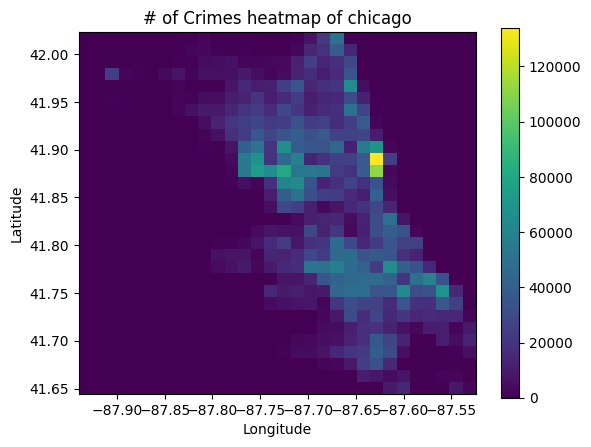

In [90]:
df = crimes.dropna(subset=['Longitude', 'Latitude'])

heatmap, xedges, yedges = np.histogram2d(df.Longitude, df.Latitude, bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.title("# of Crimes heatmap of chicago")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.show()

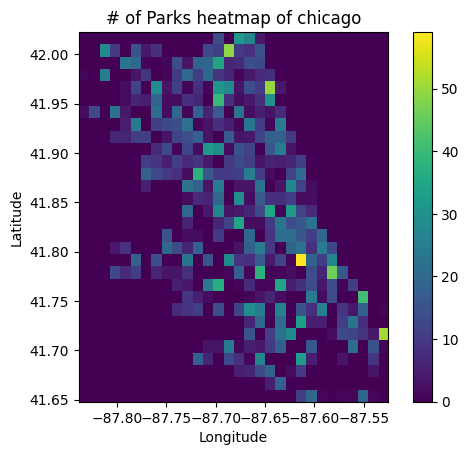

In [91]:
df = parks.dropna(subset=['x_coord', 'y_coord'])
df.x_coord = df.x_coord.astype(float)
df.y_coord = df.y_coord.astype(float)
heatmap, xedges, yedges = np.histogram2d(df.x_coord, df.y_coord, bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.title("# of Parks heatmap of chicago")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.show()